# Description

The notebooks loads target holdings, prices and pnl data. In addition, it shows how to compute PnL using target holdings in shares and price data.

# Imports

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Set default plot figsize.
plt.rcParams["figure.figsize"] = (20, 5)
# Set aspects of the visual theme for all plots.
sns.set()

# Functions

In [3]:
def load_file(dst_dir: str, file_name: str) -> pd.DataFrame:
    """
    Load file and reshape the data.

    :param dst_dir: destination dir to load a file from, e.g., /some_dir/some_subdir
    :param file_name: name of a file to load, e.g., `pnl.csv.gz`
    :return: a table containg reshaped data
    """
    # Get the file path.
    file_path = os.path.join(dst_dir, file_name)
    # Read a CSV file.
    df = pd.read_csv(file_path)
    # Convert dates to the date type.
    df["end_ts"] = pd.to_datetime(df["end_ts"])
    # Pivot the data so that timestamp becomes an index.
    df = df.pivot(index="end_ts", columns=["full_symbol"])
    return df

# Load data

In [4]:
# Replace with the destination dir to load files from.
dst_dir = "/shared_data/marketing/cmtask6334"
print(dst_dir)

/shared_data/marketing/cmtask6334


## Load target positions

In [5]:
target_holdings_file_name = "target_holdings_shares_and_prices.csv.gz"
target_holdings_df = load_file(dst_dir, target_holdings_file_name)
print(target_holdings_df.shape)
target_holdings_df.tail(3)

(110015, 50)


target_holdings_shares                     \
full_symbol                    binance::APE_USDT binance::AVAX_USDT   
end_ts                                                                
2023-10-17 23:50:00+00:00               -29091.0            -5817.0   
2023-10-17 23:55:00+00:00                24647.0            14366.0   
2023-10-18 00:00:00+00:00                    NaN                NaN   

                                                                \
full_symbol               binance::AXS_USDT binance::BAKE_USDT   
end_ts                                                           
2023-10-17 23:50:00+00:00          -11787.0           145536.0   
2023-10-17 23:55:00+00:00          -49422.0           353375.0   
2023-10-18 00:00:00+00:00               NaN                NaN   

                                                               \
full_symbol               binance::BNB_USDT binance::BTC_USDT   
end_ts                                                          
2023-10-17 23:50:00+00:00           -356.71             2.329   
2023-10-17 23:55:00+00:00           -768.08            -8.063   
2023-10-18 00:00:00+00:00               NaN               NaN   

                                                               \
full_symbol               binance::CRV_USDT binance::CTK_USDT   
end_ts                                                          
2023-10-17 23:50:00+00:00           35355.3         -196786.0   
2023-10-17 23:55:00+00:00         -148217.8          -83565.0   
2023-10-18 00:00:00+00:00               NaN               NaN   

                                                                ...  \
full_symbol               binance::DOGE_USDT binance::DOT_USDT  ...   
end_ts                                                          ...   
2023-10-17 23:50:00+00:00          -984229.0           19683.0  ...   
2023-10-17 23:55:00+00:00         -3936291.0          -29090.1  ...   
2023-10-18 00:00:00+00:00                NaN               NaN  ...   

                                        price                     \
full_symbol               binance::MATIC_USDT binance::NEAR_USDT   
end_ts                                                             
2023-10-17 23:50:00+00:00            0.518564           1.007414   
2023-10-17 23:55:00+00:00            0.518768           1.007000   
2023-10-18 00:00:00+00:00            0.518939           1.007388   

                                                                \
full_symbol               binance::OGN_USDT binance::RUNE_USDT   
end_ts                                                           
2023-10-17 23:50:00+00:00          0.115140           1.534217   
2023-10-17 23:55:00+00:00          0.115000           1.535965   
2023-10-18 00:00:00+00:00          0.114855           1.537175   

                                                                \
full_symbol               binance::SAND_USDT binance::SOL_USDT   
end_ts                                                           
2023-10-17 23:50:00+00:00           0.286934         23.929430   
2023-10-17 23:55:00+00:00           0.287000         23.938948   
2023-10-18 00:00:00+00:00           0.286597         23.929953   

                                                                  \
full_symbol               binance::STORJ_USDT binance::UNFI_USDT   
end_ts                                                             
2023-10-17 23:50:00+00:00            0.381433           6.109897   
2023-10-17 23:55:00+00:00            0.381397           6.108350   
2023-10-18 00:00:00+00:00            0.381578           6.106429   

                                                                 
full_symbol               binance::WAVES_USDT binance::XRP_USDT  
end_ts                                                           
2023-10-17 23:50:00+00:00            1.471413          0.491130  
2023-10-17 23:55:00+00:00            1.471148          0.491264  
2023-10-18 00:00:00+00:00            1.475852      

## Load bar-by-bar PnL

In [6]:
pnl_file_name = "pnl.bar_by_bar.csv.gz"
pnl_df = load_file(dst_dir, pnl_file_name)
print(pnl_df.shape)
pnl_df.tail(3)

(110008, 25)


pnl                     \
full_symbol               binance::APE_USDT binance::AVAX_USDT   
end_ts                                                           
2023-10-17 23:50:00+00:00        -16.797621          60.014563   
2023-10-17 23:55:00+00:00         14.926552          17.517011   
2023-10-18 00:00:00+00:00         -5.518191           0.132212   

                                                                \
full_symbol               binance::AXS_USDT binance::BAKE_USDT   
end_ts                                                           
2023-10-17 23:50:00+00:00         41.175482         233.187948   
2023-10-17 23:55:00+00:00       -112.249902         -29.901810   
2023-10-18 00:00:00+00:00          2.374993         -19.270941   

                                                               \
full_symbol               binance::BNB_USDT binance::BTC_USDT   
end_ts                                                          
2023-10-17 23:50:00+00:00         63.701630         95.492029   
2023-10-17 23:55:00+00:00        -84.880928         21.150080   
2023-10-18 00:00:00+00:00          8.435998         -2.718058   

                                                               \
full_symbol               binance::CRV_USDT binance::CTK_USDT   
end_ts                                                          
2023-10-17 23:50:00+00:00        152.497022        -42.436763   
2023-10-17 23:55:00+00:00         23.960813         84.120656   
2023-10-18 00:00:00+00:00         10.020550        -37.225244   

                                                                ...  \
full_symbol               binance::DOGE_USDT binance::DOT_USDT  ...   
end_ts                                                          ...   
2023-10-17 23:50:00+00:00         -72.889787        -92.346160  ...   
2023-10-17 23:55:00+00:00         -54.056723        -77.753555  ...   
2023-10-18 00:00:00+00:00          26.781309        -21.826653  ...   

                                                                  \
full_symbol               binance::MATIC_USDT binance::NEAR_USDT   
end_ts                                                             
2023-10-17 23:50:00+00:00          -15.163269         232.341175   
2023-10-17 23:55:00+00:00           30.933466          30.684812   
2023-10-18 00:00:00+00:00          -21.050671           9.127225   

                                                                \
full_symbol               binance::OGN_USDT binance::RUNE_USDT   
end_ts                                                           
2023-10-17 23:50:00+00:00         58.236999          51.159177   
2023-10-17 23:55:00+00:00         55.196882         -20.398927   
2023-10-18 00:00:00+00:00         71.499252         -35.172835   

                                                                \
full_symbol               binance::SAND_USDT binance::SOL_USDT   
end_ts                                                           
2023-10-17 23:50:00+00:00          44.627805        -53.720711   
2023-10-17 23:55:00+00:00          23.193838         14.486391   
2023-10-18 00:00:00+00:00          94.598956         14.266828   

                                                                  \
full_symbol               binance::STORJ_USDT binance::UNFI_USDT   
end_ts                                                             
2023-10-17 23:50:00+00:00           93.124711         -53.761568   
2023-10-17 23:55:00+00:00           -3.601794         -18.183518   
2023-10-18 00:00:00+00:00           15.680980          10.228925   

                                                                 
full_symbol               binance::WAVES_USDT binance::XRP_USDT  
end_ts                                                           
2023-10-17 23:50:00+00:00          -33.033168         -8.101018  
2023-10-17 23:55:00+00:00           12.623236        -24.220249  
2023-10-18 00:00:00+00:00         -163.606175         40.503285  

[3 rows x 25 columns]

## Load daily PnL

In [7]:
pnl_resampled_file_name = "pnl.daily.csv.gz"
pnl_resampled_df = load_file(dst_dir, pnl_resampled_file_name)
print(pnl_resampled_df.shape)
pnl_resampled_df.tail(3)

(383, 25)


pnl                     \
full_symbol               binance::APE_USDT binance::AVAX_USDT   
end_ts                                                           
2023-10-16 00:00:00+00:00      -2677.113270       -1537.867149   
2023-10-17 00:00:00+00:00      -1915.602390        2221.109533   
2023-10-18 00:00:00+00:00         -5.518191           0.132212   

                                                                \
full_symbol               binance::AXS_USDT binance::BAKE_USDT   
end_ts                                                           
2023-10-16 00:00:00+00:00       1664.878988       -4109.295040   
2023-10-17 00:00:00+00:00      -2016.637538       -1812.819395   
2023-10-18 00:00:00+00:00          2.374993         -19.270941   

                                                               \
full_symbol               binance::BNB_USDT binance::BTC_USDT   
end_ts                                                          
2023-10-16 00:00:00+00:00       2373.977059        851.378187   
2023-10-17 00:00:00+00:00       -492.923483       1193.258309   
2023-10-18 00:00:00+00:00          8.435998         -2.718058   

                                                               \
full_symbol               binance::CRV_USDT binance::CTK_USDT   
end_ts                                                          
2023-10-16 00:00:00+00:00       3174.065630       -203.737697   
2023-10-17 00:00:00+00:00      -1280.883112       -405.289774   
2023-10-18 00:00:00+00:00         10.020550        -37.225244   

                                                                ...  \
full_symbol               binance::DOGE_USDT binance::DOT_USDT  ...   
end_ts                                                          ...   
2023-10-16 00:00:00+00:00        2373.427509        663.170157  ...   
2023-10-17 00:00:00+00:00       -1140.020915       1636.171288  ...   
2023-10-18 00:00:00+00:00          26.781309        -21.826653  ...   

                                                                  \
full_symbol               binance::MATIC_USDT binance::NEAR_USDT   
end_ts                                                             
2023-10-16 00:00:00+00:00        -2848.876146        1495.049014   
2023-10-17 00:00:00+00:00         1529.089336       -2420.492361   
2023-10-18 00:00:00+00:00          -21.050671           9.127225   

                                                                \
full_symbol               binance::OGN_USDT binance::RUNE_USDT   
end_ts                                                           
2023-10-16 00:00:00+00:00        213.770517        1085.445515   
2023-10-17 00:00:00+00:00      -2089.254317        -202.001280   
2023-10-18 00:00:00+00:00         71.499252         -35.172835   

                                                                \
full_symbol               binance::SAND_USDT binance::SOL_USDT   
end_ts                                                           
2023-10-16 00:00:00+00:00         -91.911975       -131.593259   
2023-10-17 00:00:00+00:00        1283.820173      -1383.497432   
2023-10-18 00:00:00+00:00          94.598956         14.266828   

                                                                  \
full_symbol               binance::STORJ_USDT binance::UNFI_USDT   
end_ts                                                             
2023-10-16 00:00:00+00:00         2030.134301        1527.461195   
2023-10-17 00:00:00+00:00          -82.640263       -2503.768296   
2023-10-18 00:00:00+00:00           15.680980          10.228925   

                                                                 
full_symbol               binance::WAVES_USDT binance::XRP_USDT  
end_ts                                                           
2023-10-16 00:00:00+00:00          329.876524        609.779738  
2023-10-17 00:00:00+00:00          660.089275        469.614385  
2023-10-18 00:00:00+00:00         -163.606175         40.503285  

[3 rows x 25 columns]

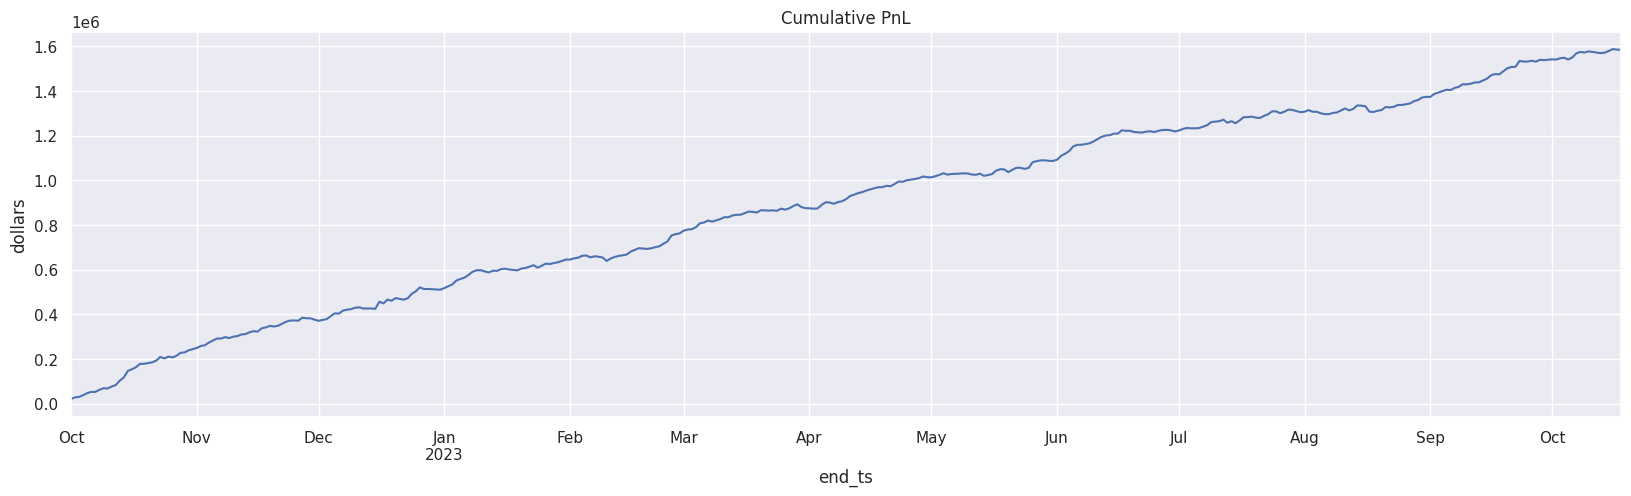

In [8]:
# Sum daily PnL across all assets and plot cumulative sum.
pnl_resampled_df.sum(axis=1, min_count=1).cumsum().plot(
    title="Cumulative PnL", ylabel="dollars"
)
plt.show()

# Compare research PnL with the PnL reconstructed from target holdings and prices

In [9]:
# Reconstruct the PnL from target holdings in shares and prices.
reconstructed_pnl = (
    target_holdings_df["target_holdings_shares"]
    .shift(2)
    .multiply(target_holdings_df["price"].diff())
)
reconstructed_pnl.tail(3)

full_symbol,binance::APE_USDT,binance::AVAX_USDT,binance::AXS_USDT,binance::BAKE_USDT,binance::BNB_USDT,binance::BTC_USDT,binance::CRV_USDT,binance::CTK_USDT,binance::DOGE_USDT,binance::DOT_USDT,...,binance::MATIC_USDT,binance::NEAR_USDT,binance::OGN_USDT,binance::RUNE_USDT,binance::SAND_USDT,binance::SOL_USDT,binance::STORJ_USDT,binance::UNFI_USDT,binance::WAVES_USDT,binance::XRP_USDT
end_ts,,,,,,,,,,,,,,,,,,,,,
2023-10-17 23:50:00+00:00,-16.797621,60.014563,41.175482,233.187948,63.701630,95.492029,152.497022,-42.436763,-72.889787,-92.346160,...,-15.163269,232.341175,58.236999,51.159177,44.627805,-53.720711,93.124711,-53.761568,-33.033168,-8.101018
2023-10-17 23:55:00+00:00,14.926552,17.517011,-112.249902,-29.901810,-84.880928,21.150080,23.960813,84.120656,-54.056723,-77.753555,...,30.933466,30.684812,55.196882,-20.398927,23.193838,14.486391,-3.601794,-18.183518,12.623236,-24.220249
2023-10-18 00:00:00+00:00,-5.518191,0.132212,2.374993,-19.270941,8.435998,-2.718058,10.020550,-37.225244,26.781309,-21.826653,...,-21.050671,9.127225,71.499252,-35.172835,94.598956,14.266828,15.680980,10.228925,-163.606175,40.503285


In [11]:
# Ensure that both versions of PnL match. Since the target positions are computed in the bar-by-bar
# fashion, we compare them againts PnL of the same granularity.
pnl_df["pnl"].corrwith(reconstructed_pnl)

full_symbol
binance::APE_USDT      1.0
binance::AVAX_USDT     1.0
binance::AXS_USDT      1.0
binance::BAKE_USDT     1.0
binance::BNB_USDT      1.0
binance::BTC_USDT      1.0
binance::CRV_USDT      1.0
binance::CTK_USDT      1.0
binance::DOGE_USDT     1.0
binance::DOT_USDT      1.0
binance::DYDX_USDT     1.0
binance::ETH_USDT      1.0
binance::FTM_USDT      1.0
binance::GMT_USDT      1.0
binance::LINK_USDT     1.0
binance::MATIC_USDT    1.0
binance::NEAR_USDT     1.0
binance::OGN_USDT      1.0
binance::RUNE_USDT     1.0
binance::SAND_USDT     1.0
binance::SOL_USDT      1.0
binance::STORJ_USDT    1.0
binance::UNFI_USDT     1.0
binance::WAVES_USDT    1.0
binance::XRP_USDT      1.0
dtype: float64